**Arboles de Decisión**

In [1]:
#Imporatmos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [44]:
#1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

**Mostramos las 5 primeras filas del dataset**

In [6]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Total de filas y columnas**

In [3]:
data.shape

(1599, 12)

**Estadisticas**

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [45]:
#2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
#3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

**Histograma sobre el item Alcohol**

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

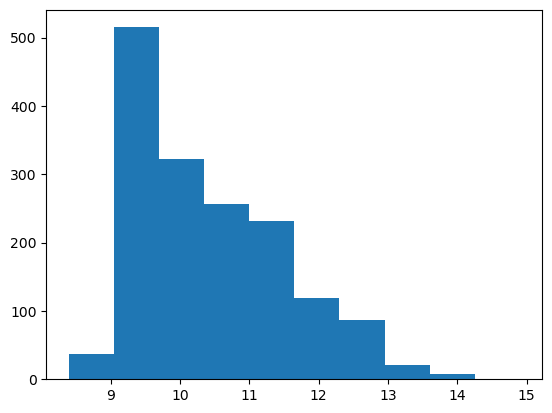

In [7]:
plt.hist(data.alcohol)

In [39]:
#El histograma permite comprender mejor la distribución y las características centrales y de dispersión del contenido de alcohol en tus datos.

**Diagrama de dispersión**

<Axes: xlabel='pH', ylabel='fixed acidity'>

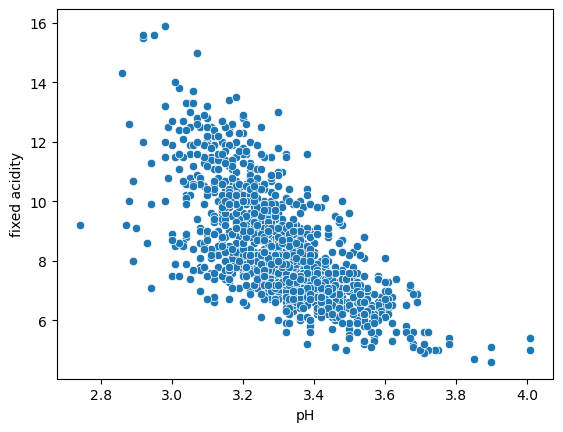

In [8]:
sns.scatterplot(x = "pH", y = "fixed acidity", data = data)

In [40]:
#Con este diagrama de dispersión se puede explorar cómo el nivel de acidez fija se relaciona con el pH del vino.

In [9]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", 
                  "residual sugar", "chlorides", "free sulfur dioxide", 
                  "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_col = ["quality"]

In [10]:
predictors = data [predictors_col]
target = data [target_col]

In [11]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


**Correlación entre las varaibles predictoras**

In [13]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [43]:
#Fuerte correlación positiva:
#Por ejemplo, hay una correlación positiva relativamente fuerte entre "fixed acidity" y "citric acid" (0.671703), lo que sugiere que a medida que 
#aumenta la acidez fija, también tiende a aumentar la cantidad de ácido cítrico en el vino. También hay una correlación positiva fuerte entre "density" 
#y "fixed acidity" (0.668047), lo que sugiere que a medida que aumenta la densidad, también tiende a aumentar la acidez fija. Otro ejemplo es la 
#correlación positiva entre "density" y "citric acid" (0.364947).

#Fuerte correlación negativa:
#Hay una correlación negativa fuerte entre "fixed acidity" y "pH" (-0.682978), lo que indica que a medida que aumenta la acidez fija, el pH tiende a 
#disminuir. También hay una correlación negativa fuerte entre "density" y "alcohol" (-0.496180), lo que sugiere que a medida que aumenta la densidad, 
#tiende a disminuir el contenido de alcohol.

#Correlaciones débiles o nulas:
#Algunas variables tienen correlaciones débiles o nulas entre sí, como "residual sugar" y "volatile acidity" (0.001918).
#Otras correlaciones débiles incluyen "residual sugar" y "alcohol" (0.042075), "residual sugar" y "pH" (0.085652), entre otros.

**Mapa de calor de la correlación**

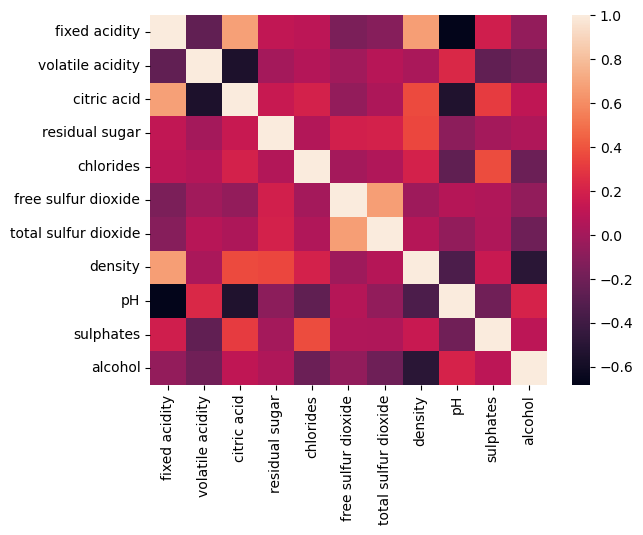

In [14]:
sns.heatmap(corr)
plt.show()

In [47]:
# 4 Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.1, random_state=13)

In [20]:
tree = DecisionTreeClassifier()

In [21]:
arbol = tree.fit(X_train, y_train)

In [49]:
# 5 Entrenar el modelo configurando los diferentes hiperparámetros.
# 6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
# 7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

**Arbol de decisión dividiendo los datos en un 90% para entrenamiento y un 10% para pruebas**

[Text(0.5163556974616635, 0.9772727272727273, 'x[10] <= 10.525\ngini = 0.641\nsamples = 1439\nvalue = [9, 50, 613, 577, 177, 13]'),
 Text(0.344441217472119, 0.9318181818181818, 'x[6] <= 83.5\ngini = 0.541\nsamples = 878\nvalue = [6, 32, 516, 292, 32, 0]'),
 Text(0.17810176579925652, 0.8863636363636364, 'x[9] <= 0.575\ngini = 0.576\nsamples = 697\nvalue = [6, 29, 365, 266, 31, 0]'),
 Text(0.08141263940520446, 0.8409090909090909, 'x[10] <= 9.75\ngini = 0.49\nsamples = 258\nvalue = [3, 20, 174, 57, 4, 0]'),
 Text(0.03680297397769517, 0.7954545454545454, 'x[10] <= 9.075\ngini = 0.371\nsamples = 158\nvalue = [1, 13, 123, 20, 1, 0]'),
 Text(0.01412639405204461, 0.75, 'x[8] <= 3.345\ngini = 0.642\nsamples = 9\nvalue = [0, 3, 2, 4, 0, 0]'),
 Text(0.008178438661710037, 0.7045454545454546, 'x[5] <= 13.5\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.0052044609665427505, 0.6590909090909091, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.011152416356877323, 0.659

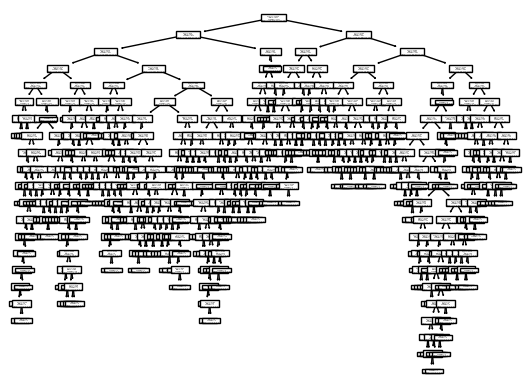

In [22]:
plot_tree(arbol)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [28]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=13)

In [29]:
arbol = tree.fit(X_train, y_train)

**Arbol de decisión ajustando el DecisionTreeClassifier para simplificarlo y hacerlo más interpretable**

[Text(0.5, 0.875, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.25, 0.625, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.125, 0.375, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.0625, 0.125, 'gini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.331\nsamples = 172\nvalue = [2, 12, 139, 18, 1, 0]'),
 Text(0.375, 0.375, 'x[6] <= 81.5\ngini = 0.568\nsamples = 591\nvalue = [4, 16, 307, 236, 28, 0]'),
 Text(0.3125, 0.125, 'gini = 0.584\nsamples = 485\nvalue = [4, 14, 222, 218, 27, 0]'),
 Text(0.4375, 0.125, 'gini = 0.328\nsamples = 106\nvalue = [0, 2, 85, 18, 1, 0]'),
 Text(0.75, 0.625, 'x[9] <= 0.735\ngini = 0.646\nsamples = 505\nvalue = [3, 16, 85, 254, 135, 12]'),
 Text(0.625, 0.375, 'x[6] <= 15.5\ngini = 0.628\nsamples = 349\nvalue = [3, 16, 71, 190, 62, 7]'),
 Text(0.5625, 0.125, 'gini = 0.732\nsamples = 90\nvalue = [3, 

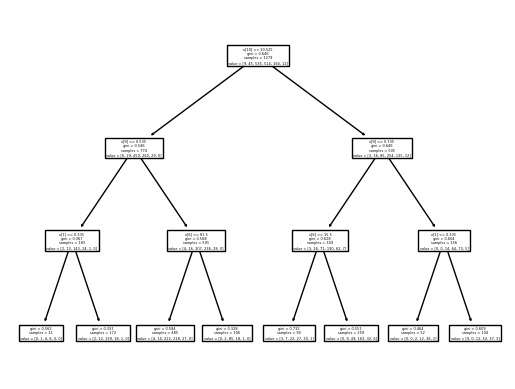

In [30]:
plot_tree(arbol)

In [50]:
# 8 Interpretar, analizar y documentar los resultados obtenidos.

In [42]:
#Nodo Raíz:
#Este nodo se divide en función de la variable x[10] (presumiblemente una de las características de los datos) con un valor de corte de 10.525.
#Se observan seis clases de calidad del vino representadas en las muestras de este nodo.

#Primer Nodo Interno:
#Este nodo se divide nuevamente en función de la variable x[9] (otra característica) con un valor de corte de 0.535.
#Se observan seis clases de calidad del vino representadas en las muestras de este nodo.

#Segundo Nodo Interno (Dentro del Primer Nodo Interno):
#Este nodo se divide nuevamente en función de la variable x[1] con un valor de corte de 0.335.
#Se observan seis clases de calidad del vino representadas en las muestras de este nodo.

#Nodo Hoja (Dentro del Segundo Nodo Interno):
#Este nodo representa una de las clasificaciones finales para las muestras que cumplen las condiciones anteriores.
#Se observan seis clases de calidad del vino y el número de muestras asignadas a cada clase.

#El árbol de decisión continúa dividiendo los datos en subconjuntos más pequeños en función de diferentes características y valores de corte, 
#hasta que alcanza nodos hoja que representan las predicciones finales.

In [31]:
predicciones = arbol.predict(X_test)

**Predicciones**

In [32]:
predicciones

array([7, 6, 5, 6, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 7, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 7,
       5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 7, 7, 6, 6, 5, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       7, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 7,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 7, 7, 5, 5, 5, 7, 7, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5,
       5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5,

In [34]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames = ['Actual'], colnames = ['Predicciones'])

Predicciones,5,6,7
Actual,,,
3,1,0,0
4,5,1,2
5,125,17,4
6,68,48,8
7,8,15,12
8,2,4,0


In [38]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.578125